# Credit Card Clustering

Credit card clustering means grouping credit card holders based on their buying habits, credit limits, and many more financial factors. It is also known as credit card segmentation. Such clustering analysis helps businesses find their potential customers and many more marketing strategies.

In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
# load the Dataset
data = pd.read_csv(r"D:\Credit card clustering\Credit-card-data\Credit card data\CC GENERAL.csv")

In [4]:
data.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [5]:
#checking for missing values 
missing_values = data.isnull().sum()
missing_values

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [6]:
# Fill missing values with median
data.fillna(data.median(), inplace=True)

In [7]:
# removing unnecessary columns
data.drop(columns=['CUST_ID'], inplace=True)

In [8]:
# Normalize the data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
normalized_data = scaler.fit_transform(data)

In [9]:
# Feature Scaling
data['Total_Spending'] = data['ONEOFF_PURCHASES'] + data['INSTALLMENTS_PURCHASES']
data['Average_Transaction_Value'] = data['Total_Spending'] / data['PURCHASES_TRX']

In [10]:
# Dimensionality Reduction (Optional)
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_data = pca.fit_transform(normalized_data)


In [11]:
pca_data

array([[-1.68365008, -1.0722413 ],
       [-1.13409011,  2.50915313],
       [ 0.96940145, -0.38358785],
       ...,
       [-0.92898591, -1.80804704],
       [-2.33784691, -0.65360593],
       [-0.55802382, -0.40064554]])

### Determine Optimal Number of Clusters:  
Use methods like the Elbow Method and Silhouette Score to determine the optimal number of clusters.

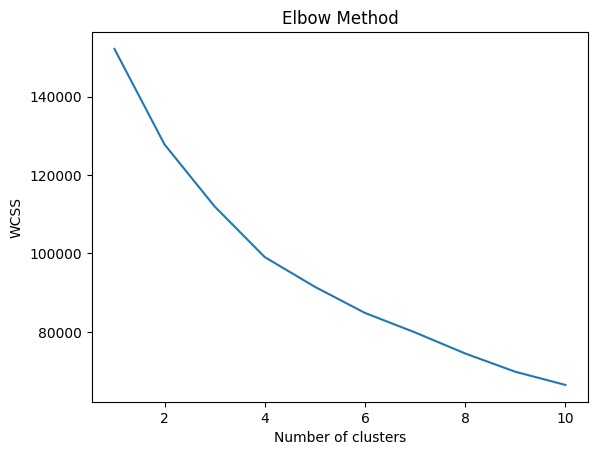

In [12]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(normalized_data)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

## Clustering

In [13]:
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=42)
clusters = kmeans.fit_predict(normalized_data)

# Add cluster labels to the original data
data['Cluster'] = clusters


###  Evaluate and Visualize Clusters

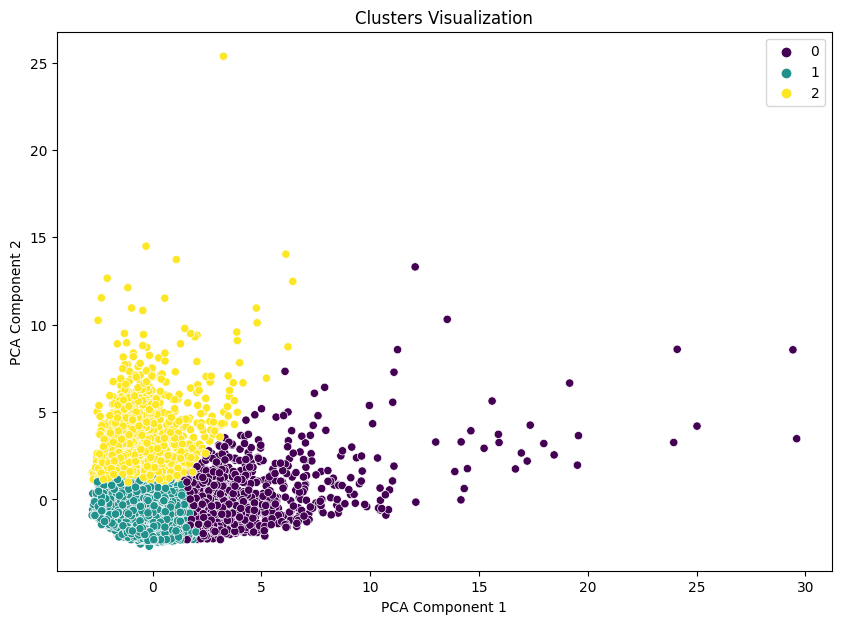

             BALANCE  BALANCE_FREQUENCY    PURCHASES  ONEOFF_PURCHASES  \
Cluster                                                                  
0        2182.352833           0.981702  4187.017796       2663.995153   
1         807.722510           0.834577   496.062522        247.273214   
2        4023.788865           0.959193   389.051448        252.333261   

         INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
Cluster                                                              
0                   1523.493231    449.753140             0.948175   
1                    249.110368    338.996760             0.460353   
2                    136.797412   3917.254973             0.233899   

         ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
Cluster                                                                 
0                          0.664780                          0.739630   
1                          0.129191                        

In [14]:
import seaborn as sns

# PCA Visualization
plt.figure(figsize=(10, 7))
sns.scatterplot(x=pca_data[:, 0], y=pca_data[:, 1], hue=clusters, palette='viridis')
plt.title('Clusters Visualization')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

# Cluster Profiling
cluster_profiles = data.groupby('Cluster').mean()
print(cluster_profiles)
